In [1]:
import numpy as np
import sys, os
sys.path.append('..')
import matplotlib.pyplot as plt

In [2]:
from common.functions import softmax
from ch06.rnnlm import Rnnlm
from ch06.better_rnnlm import BetterRnnlm

In [3]:
### 문장 생성 구현 : 기존의 Rnnlm 모델에 문장 생성 메서드만 추가
class RnnlmGen(Rnnlm):
    def generate(self, start_id, skip_ids=None, sample_size=100):
        word_ids = [start_id]
        
        x = start_id
        while len(word_ids) < sample_size:
            x = np.array(x).reshape(1,1)
            score = self.predict(x)
            p = softmax(score.flatten())
            
            sampled = np.random.choice(len(p), size=1, p=p)
            if (skip_ids is None) or (sampled not in skip_ids):
                x = sampled
                word_ids.append(int(x))
                
        return word_ids

In [4]:
from dataset import ptb

In [5]:
model = Rnnlm()

In [6]:
corpus, word_to_id, id_to_word = ptb.load_data('train')
vocab_size = len(word_to_id)
corpus_size = len(corpus)

In [7]:
start_word = 'you'
start_id = word_to_id[start_word]
start_id

316

In [8]:
word_ids = [start_id]
word_ids

[316]

In [9]:
x = start_id
x

316

In [10]:
x = np.array(x).reshape(1,1)
score = model.predict(x)
p = softmax(score.flatten())
p

array([1.00093494e-04, 1.00291712e-04, 9.99881086e-05, ...,
       1.00356512e-04, 9.96220115e-05, 1.00208184e-04], dtype=float32)

In [11]:
sampled = np.random.choice(len(p), size = 1, p=p)
x = sampled
word_ids.append(int(x))
x, word_ids

(array([2872]), [316, 2872])

In [12]:
### 학습을 수행하지 않은 상태에서 문장 생성
corpus, word_to_id, id_to_word = ptb.load_data('train')
corpus_size = len(corpus)
vocab_size = len(word_to_id)

model = RnnlmGen()

start_word = 'you'
srart_id = word_to_id[start_word]
skip_words = ['N', '<unk>', '$']
skip_ids = [word_to_id[w] for w in skip_words]

word_ids = model.generate(start_id, skip_ids)
txt = ' '.join([id_to_word[i] for i in word_ids])
txt = txt.replace(' <eos>', '.\n')
txt

'you importance edt print discussing promised dialogue edward dec. arts korotich software enron genetics applause doing seattle epo fla fred italian banknote giving detailing forecast studio indonesia rocket dpc champion move mosbacher vietnamese murphy handles apply seagate notion clinical redeemed pact korea brink hybrid slow occasions mass. bailout accident peru factor track forward regarding sedan marshall loud ruled deliver witnesses raising powerful eduard today backdrop prevailed confident considered takeover-stock werner rothschilds unilever folk mechanical d. equity metal swift panamanian durable complained turn pricing community traffickers civil wins civilian perjury eye centuries owned be costing sole burgess spy rapid financial channel'

In [13]:
### 학습 후 문장 생성
corpus, word_to_id, id_to_word = ptb.load_data('train')
corpus_size = len(corpus)
vocab_size = len(word_to_id)

model = RnnlmGen()
model.load_params('../ch06/Rnnlm.pkl')

start_word = 'you'
srart_id = word_to_id[start_word]
skip_words = ['N', '<unk>', '$']
skip_ids = [word_to_id[w] for w in skip_words]

word_ids = model.generate(start_id, skip_ids)
txt = ' '.join([id_to_word[i] for i in word_ids])
txt = txt.replace(' <eos>', '.\n')
txt

"you had fallen to a special price of total sales growth and television copper profits.\n on the chancellor 's clause ground espn says brian is a human trusts endorsed by the governor of the ad relief which the exceptions were properly believed to end up the exact homeless.\n the song said that east berlin is filled and qualified autos.\n once would n't say whether we are turning out of to react forward between the advocates of our export big board.\n some of the enforcement reputation is under fire though at least three weeks.\n the leadership"

In [14]:
### 기존 BetterRnnlm 클래스에 문장 생성 메서드 추가
class BetterRnnlmGen(BetterRnnlm):
    def generate(self, start_id, skip_ids=None, sample_size=100):
        word_ids = [start_id]
        
        x = start_id
        while len(word_ids) < sample_size:
            x = np.array(x).reshape(1,1)
            score = self.predict(x)
            p = softmax(score.flatten())
            
            sampled = np.random.choice(len(p), size=1, p=p)
            if (skip_ids is None) or (sampled not in skip_ids):
                x = sampled
                word_ids.append(int(x))
                
        return word_ids

In [15]:
### 개선한 모델을 이용해 학습 후 문장 생성
corpus, word_to_id, id_to_word = ptb.load_data('train')
corpus_size = len(corpus)
vocab_size = len(word_to_id)

model = BetterRnnlmGen()
model.load_params('BetterRnnlm.pkl')

start_word = 'you'
srart_id = word_to_id[start_word]
skip_words = ['N', '<unk>', '$']
skip_ids = [word_to_id[w] for w in skip_words]

word_ids = model.generate(start_id, skip_ids)
txt = ' '.join([id_to_word[i] for i in word_ids])
txt = txt.replace(' <eos>', '.\n')
txt

'you made the account and the market rating when mr. schwartz who prohibited the company in an office in new jersey.\n in a briefing prepared to the three men and said that many manufacturers for the century appeared to be particularly influenced by the dive she said.\n in addition recent commodity banking firms include part of building and allegedly held the cushion.\n the cftc chairman greenspan said the last estimate appears he will just sell his large confidence in the day-to-day market.\n some analysts questioned whether mr. greenspan was disappointed by mr. lawson that the fed'

In [16]:
### 개선한 모델을 이용해 학습 후 문장 생성
corpus, word_to_id, id_to_word = ptb.load_data('train')
corpus_size = len(corpus)
vocab_size = len(word_to_id)

model = BetterRnnlmGen()
model.load_params('BetterRnnlm.pkl')

start_words = 'the meaning of life is'
start_ids = [word_to_id[w] for w in start_words.split(' ')]

for x in start_ids[:-1]:
    x = np.array(x).reshape(1, 1)
    model.predict(x)
    
skip_words = ['N', '<unk>', '$']
skip_ids = [word_to_id[w] for w in skip_words]

word_ids = model.generate(start_ids[-1], skip_ids)
word_ids = start_ids[:-1] + word_ids
txt = ' '.join([id_to_word[i] for i in word_ids])
txt = txt.replace(' <eos>', '.\n')
txt

"the meaning of life is a model.\n the garrison had nor increased the size of the market and the firms trade through a atlantic coast.\n in the past year he took a big string of corporate products because of a shortage of japanese products on at least three years exceeding.\n since then four invested in stock prices and thus gained new boston to go for the future of these money in the environment chicago west germany 's general and commerce department stressed that as long as a result they have withdrawn their securities by december.\n for the past three years"

In [17]:
corpus, word_to_id, id_to_word = ptb.load_data('train')
corpus_size = len(corpus)
vocab_size = len(word_to_id)

model = BetterRnnlmGen()
model.load_params('BetterRnnlm.pkl')

start_words = 'the meaning of life is'
start_ids = [word_to_id[w] for w in start_words.split(' ')]

In [18]:
for x in start_ids[:-1]:
    x = np.array(x).reshape(1,1)
    model.predict(x)
    
skip_words = ['N', '<unk>', '$']
skip_ids = [word_to_id[w] for w in skip_words]

word_ids = model.generate(start_ids[-1], skip_ids)
word_ids = start_ids[:-1] + word_ids
txt = ' '.join([id_to_word[w] for w in word_ids])
txt = txt.replace(' <eos>', '.\n')

In [19]:
from dataset import sequence

In [20]:
### seq2seq를 이용해서 장난감 문제(더하기) 다루기
(x_train, t_train), (x_test, t_test) = sequence.load_data('addition.txt', seed=1984)
char_to_id, id_to_char = sequence.get_vocab()

In [21]:
print(x_train.shape, t_train.shape)
print(x_test.shape, t_test.shape)

(45000, 7) (45000, 5)
(5000, 7) (5000, 5)


In [22]:
x_train

array([[ 3,  0,  2, ...,  0, 11,  5],
       [ 4,  0,  9, ...,  8,  8, 10],
       [ 1,  1,  2, ...,  9,  0,  5],
       ...,
       [ 3,  1, 10, ...,  8,  0,  3],
       [ 1,  2,  8, ...,  0,  5,  5],
       [ 8,  2,  4, ..., 10,  5,  5]])

In [23]:
t_train

array([[ 6,  0, 11,  7,  5],
       [ 6,  3, 10, 10,  5],
       [ 6,  3,  1,  3,  5],
       ...,
       [ 6,  7, 11,  9,  5],
       [ 6,  8,  3,  3,  5],
       [ 6,  4,  1,  4,  5]])

In [24]:
print(x_train[0])
print(t_train[0])

[ 3  0  2  0  0 11  5]
[ 6  0 11  7  5]


In [25]:
id_to_char

{0: '1',
 1: '6',
 2: '+',
 3: '7',
 4: '5',
 5: ' ',
 6: '_',
 7: '9',
 8: '2',
 9: '0',
 10: '3',
 11: '8',
 12: '4'}

In [26]:
print(''.join([id_to_char[c] for c in x_train[0]]))
print(''.join([id_to_char[c] for c in t_train[0]]))

71+118 
_189 


In [27]:
from common.time_layers import *
from common.base_model import BaseModel

In [28]:
### Encoder 클래스 구현
class Encoder:
    def __init__(self, vocab_size, wordvec_size, hidden_size):
        V, D, H = vocab_size, wordvec_size, hidden_size
        
        embd_W = (np.random.randn(V, D) / 100).astype('f')
        lstm_Wx = (np.random.randn(D, 4*H) / np.sqrt(D)).astype('f')
        lstm_Wh = (np.random.randn(H, 4*H) / np.sqrt(H)).astype('f')
        lstm_b = np.zeros(4*H).astype('f')
        
        self.embed = TimeEmbedding(embd_W)
        self.lstm = TimeLSTM(lstm_Wx, lstm_Wh, lstm_b, stateful=False)
        
        self.params = self.embed.params + self.lstm.params
        self.grads = self.embed.grads + self.lstm.grads
        self.hs = None
        
    def forward(self, xs):
        xs = self.embed.forward(xs)
        hs = self.lstm.forward(xs)
        self.hs = hs
        
        return hs[:,-1,:]
    
    def backward(self, dh):
        dhs = np.zeros_like(self.hs)
        dhs[:,-1,:] = dh
        
        dout = self.lstm.backward(dhs)
        dout = self.embed.backward(dout)
        return dout

In [29]:
class Decoder:
    def __init__(self, vocab_size, wordvec_size, hidden_size):
        V, D, H = vocab_size, wordvec_size, hidden_size
        
        embed_W = (np.random.randn(V,D) / 100).astype('f')
        lstm_Wx = (np.random.randn(D, 4*H) / np.sqrt(D)).astype('f')
        lstm_Wh = (np.random.randn(H, 4*H) / np.sqrt(H)).astype('f')
        lstm_b = np.zeros(4*H).astype('f')
        affine_W = (np.random.randn(H,V) / np.sqrt(H)).astype('f')
        affine_b = np.zeros(V).astype('f')
        
        self.embed = TimeEmbedding(embed_W)
        self.lstm = TimeLSTM(lstm_Wx, lstm_Wh, lstm_b, stateful=True)
        self.affine = TimeAffine(affine_W, affine_b)
        
        self.params, self.grads = [], []
        for layer in (self.embed, self.lstm, self.affine):
            self.params += layer.params
            self.grads += layer.grads
            
    def forward(self, xs, h):
        self.lstm.set_state(h)
        
        out = self.embed.forward(xs)
        out = self.lstm.forward(out)
        score = self.affine.forward(out)
        return score
    
    def backward(self, dscore):
        dout = self.affine.backward(dscore)
        dout = self.lstm.backward(dout)
        dout = self.embed.backward(dout)
        dh = self.lstm.dh
        return dh
    
    def generate(self, h, start_id, sample_size):
        sample_id = start_id
        sampled = []
        self.lstm.set_state(h)
        
        for _ in range(sample_size):
            x = np.array(sample_id).reshape((1,1))
            out = self.embed.forward(x)
            out = self.lstm.forward(out)
            score = self.affine.forward(out)
            
            sample_id = np.argmax(score.flatten())
            sampled.append(int(sample_id))
            
        return sampled

In [30]:
### seq2seq 클래스 구현
class Seq2seq(BaseModel):
    def __init__(self, vocab_size, wordvec_size, hidden_size):
        V, D, H = vocab_size, wordvec_size, hidden_size
        
        self.encoder = Encoder(V,D,H)
        self.decoder = Decoder(V,D,H)
        self.softmax = TimeSoftmaxWithLoss()
        
        self.params = self.encoder.params + self.decoder.params
        self.grads = self.encoder.grads + self.decoder.grads
        
    def forward(self, xs, ts):
        decoder_xs, decoder_ts = ts[:, :-1], ts[:, 1:]
        
        h = self.encoder.forward(xs)
        score = self.decoder.forward(decoder_xs, h)
        loss = self.softmax.forward(score, decoder_ts)
        return loss
    
    def backward(self, dout=1):
        dout = self.softmax.backward(dout)
        dh = self.decoder.backward(dout)
        dout = self.encoder.backward(dh)
        return dout
    
    def generate(self, xs, start_id, sample_size):
        h = self.encoder.forward(xs)
        sampled = self.decoder.generate(h, start_id, sample_size)
        return sampled

In [31]:
from common.optimizer import Adam
from common.trainer import Trainer
from peeky_seq2seq import PeekySeq2seq

In [32]:
### seq2seq 평가 척도
def eval_seq2seq(model, question, correct, id_to_char, verbos=False, is_reverse=False):
    correct = correct.flatten()
    start_id = correct[0]
    correct = correct[1:]
    guess = model.generate(question, start_id, len(correct))
    
    question = ''.join([id_to_char[int(c)] for c in question.flatten()])
    correct = ''.join([id_to_char[int(c)] for c in correct])
    guess = ''.join([id_to_char[int(c)] for c in guess])
    
    if verbos:
        if is_reverse:
            question = question[::-1]
            
        colors = {'ok': '\033[92m', 'fail': '\033[91m', 'close': '\033[0m'}
        print(f'Q {question}')
        print(f'T {correct}')

        if correct == guess:
            mark = colors['ok'] + '☑' + colors['close']
            print(f'{mark} {guess}')
        else:
            mark = colors['fail'] + '☒' + colors['close']
            print(f'{mark} {guess}')
        print('---')
    
    return 1 if guess == correct else 0

In [33]:
id_to_char

{0: '1',
 1: '6',
 2: '+',
 3: '7',
 4: '5',
 5: ' ',
 6: '_',
 7: '9',
 8: '2',
 9: '0',
 10: '3',
 11: '8',
 12: '4'}

In [34]:
question, correct = x_train[[0]], t_train[[0]]

In [35]:
question, correct

(array([[ 3,  0,  2,  0,  0, 11,  5]]), array([[ 6,  0, 11,  7,  5]]))

In [36]:
correct = correct.flatten()
start_id = correct[0]
correct = correct[1:]

In [37]:
start_id

6

In [38]:
correct

array([ 0, 11,  7,  5])

In [39]:
guess = model.generate(question, start_id, len(correct))
guess

ValueError: cannot reshape array of size 7 into shape (1,1)

In [ ]:
question = ''.join([id_to_char[int(c)] for c in question.flatten()])
correct = ''.join([id_to_char[c] for c in correct])
guess = ''.join([id_to_char[int(c)] for c in guess])

In [ ]:
question, correct, guess

In [ ]:
colors = {'ok': '\033[92m', 'fail': '\033[91m', 'close': '\033[0m'}
print(f'Q {question}')
print(f'T {correct}')

In [ ]:
is_window = os.name == 'nt'

if correct == guess:
    mark = colors['ok'] + '☑' + colors['close']
    print(f'{mark} {guess}')
else:
    mark = colors['fail'] + '☒' + colors['close']
    print(f'{mark} {guess}')

In [ ]:
if guess == correct:
    print(1)
else: print(0)

In [41]:
### seq2seq 평가
(x_train, t_train), (x_test, t_test) = sequence.load_data('addition.txt')
char_to_id, id_to_char = sequence.get_vocab()

vocab_size = len(char_to_id)
wordvec_size = 16
hidden_size = 128
batch_size = 128
max_epoch = 25
max_grad = 5.0

model = Seq2seq(vocab_size, wordvec_size, hidden_size)
optimizer = Adam()
trainer = Trainer(model, optimizer)

acc_list = []
for epoch in range(max_epoch):
    trainer.fit(x_train, t_train, max_epoch=1, batch_size=batch_size, max_grad=max_grad)
    
    correct_num = 0
    for i in range(len(x_test)):
        question, correct = x_test[[i]], t_test[[i]]
        verbose = i < 10
        correct_num += eval_seq2seq(model, question, correct, id_to_char, verbose)
        
    acc = float(correct_num) / len(x_test)
    acc_list.append(acc)
    print(f'검증 정확도: {acc * 100}')

| 에폭 1 |  반복 1 / 351 | 시간 0[s] | 손실 2.56
| 에폭 1 |  반복 21 / 351 | 시간 2[s] | 손실 2.53
| 에폭 1 |  반복 41 / 351 | 시간 4[s] | 손실 2.17
| 에폭 1 |  반복 61 / 351 | 시간 6[s] | 손실 1.96
| 에폭 1 |  반복 81 / 351 | 시간 8[s] | 손실 1.92
| 에폭 1 |  반복 101 / 351 | 시간 10[s] | 손실 1.87
| 에폭 1 |  반복 121 / 351 | 시간 13[s] | 손실 1.85
| 에폭 1 |  반복 141 / 351 | 시간 15[s] | 손실 1.83
| 에폭 1 |  반복 161 / 351 | 시간 17[s] | 손실 1.79
| 에폭 1 |  반복 181 / 351 | 시간 19[s] | 손실 1.77
| 에폭 1 |  반복 201 / 351 | 시간 21[s] | 손실 1.77
| 에폭 1 |  반복 221 / 351 | 시간 23[s] | 손실 1.76
| 에폭 1 |  반복 241 / 351 | 시간 25[s] | 손실 1.76
| 에폭 1 |  반복 261 / 351 | 시간 27[s] | 손실 1.76
| 에폭 1 |  반복 281 / 351 | 시간 30[s] | 손실 1.75
| 에폭 1 |  반복 301 / 351 | 시간 32[s] | 손실 1.74
| 에폭 1 |  반복 321 / 351 | 시간 34[s] | 손실 1.75
| 에폭 1 |  반복 341 / 351 | 시간 36[s] | 손실 1.74
Q 77+85  
T 162 
☒ 100 
---
Q 975+164
T 1139
☒ 1000
---
Q 582+84 
T 666 
☒ 1000
---
Q 8+155  
T 163 
☒ 100 
---
Q 367+55 
T 422 
☒ 1000
---
Q 600+257
T 857 
☒ 1000
---
Q 761+292
T 1053
☒ 1000
---
Q 830+597
T 1427
☒ 1000

| 에폭 8 |  반복 21 / 351 | 시간 2[s] | 손실 1.04
| 에폭 8 |  반복 41 / 351 | 시간 4[s] | 손실 1.04
| 에폭 8 |  반복 61 / 351 | 시간 6[s] | 손실 1.03
| 에폭 8 |  반복 81 / 351 | 시간 8[s] | 손실 1.03
| 에폭 8 |  반복 101 / 351 | 시간 10[s] | 손실 1.04
| 에폭 8 |  반복 121 / 351 | 시간 13[s] | 손실 1.04
| 에폭 8 |  반복 141 / 351 | 시간 15[s] | 손실 1.03
| 에폭 8 |  반복 161 / 351 | 시간 17[s] | 손실 1.04
| 에폭 8 |  반복 181 / 351 | 시간 19[s] | 손실 1.03
| 에폭 8 |  반복 201 / 351 | 시간 21[s] | 손실 1.02
| 에폭 8 |  반복 221 / 351 | 시간 23[s] | 손실 1.02
| 에폭 8 |  반복 241 / 351 | 시간 25[s] | 손실 1.02
| 에폭 8 |  반복 261 / 351 | 시간 27[s] | 손실 1.02
| 에폭 8 |  반복 281 / 351 | 시간 29[s] | 손실 1.01
| 에폭 8 |  반복 301 / 351 | 시간 31[s] | 손실 1.02
| 에폭 8 |  반복 321 / 351 | 시간 33[s] | 손실 1.01
| 에폭 8 |  반복 341 / 351 | 시간 35[s] | 손실 1.04
Q 77+85  
T 162 
☒ 156 
---
Q 975+164
T 1139
☒ 1160
---
Q 582+84 
T 666 
☒ 655 
---
Q 8+155  
T 163 
☒ 150 
---
Q 367+55 
T 422 
☒ 400 
---
Q 600+257
T 857 
☒ 836 
---
Q 761+292
T 1053
☒ 1039
---
Q 830+597
T 1427
☒ 1449
---
Q 26+838 
T 864 
☒ 858 
---
Q 143+93

검증 정확도: 6.660000000000001
| 에폭 15 |  반복 1 / 351 | 시간 0[s] | 손실 0.85
| 에폭 15 |  반복 21 / 351 | 시간 2[s] | 손실 0.91
| 에폭 15 |  반복 41 / 351 | 시간 4[s] | 손실 0.92
| 에폭 15 |  반복 61 / 351 | 시간 6[s] | 손실 0.94
| 에폭 15 |  반복 81 / 351 | 시간 8[s] | 손실 0.88
| 에폭 15 |  반복 101 / 351 | 시간 10[s] | 손실 0.88
| 에폭 15 |  반복 121 / 351 | 시간 12[s] | 손실 0.89
| 에폭 15 |  반복 141 / 351 | 시간 14[s] | 손실 0.91
| 에폭 15 |  반복 161 / 351 | 시간 16[s] | 손실 0.90
| 에폭 15 |  반복 181 / 351 | 시간 19[s] | 손실 0.89
| 에폭 15 |  반복 201 / 351 | 시간 21[s] | 손실 0.89
| 에폭 15 |  반복 221 / 351 | 시간 23[s] | 손실 0.86
| 에폭 15 |  반복 241 / 351 | 시간 25[s] | 손실 0.88
| 에폭 15 |  반복 261 / 351 | 시간 27[s] | 손실 0.87
| 에폭 15 |  반복 281 / 351 | 시간 29[s] | 손실 0.87
| 에폭 15 |  반복 301 / 351 | 시간 31[s] | 손실 0.87
| 에폭 15 |  반복 321 / 351 | 시간 34[s] | 손실 0.86
| 에폭 15 |  반복 341 / 351 | 시간 35[s] | 손실 0.87
Q 77+85  
T 162 
☒ 164 
---
Q 975+164
T 1139
☒ 1136
---
Q 582+84 
T 666 
☑ 666 
---
Q 8+155  
T 163 
☒ 158 
---
Q 367+55 
T 422 
☒ 424 
---
Q 600+257
T 857 
☒ 866 
---
Q 761+2

검증 정확도: 9.42
| 에폭 22 |  반복 1 / 351 | 시간 0[s] | 손실 0.81
| 에폭 22 |  반복 21 / 351 | 시간 1[s] | 손실 0.78
| 에폭 22 |  반복 41 / 351 | 시간 3[s] | 손실 0.79
| 에폭 22 |  반복 61 / 351 | 시간 5[s] | 손실 0.80
| 에폭 22 |  반복 81 / 351 | 시간 7[s] | 손실 0.78
| 에폭 22 |  반복 101 / 351 | 시간 8[s] | 손실 0.83
| 에폭 22 |  반복 121 / 351 | 시간 10[s] | 손실 0.82
| 에폭 22 |  반복 141 / 351 | 시간 12[s] | 손실 0.82
| 에폭 22 |  반복 161 / 351 | 시간 14[s] | 손실 0.83
| 에폭 22 |  반복 181 / 351 | 시간 16[s] | 손실 0.82
| 에폭 22 |  반복 201 / 351 | 시간 18[s] | 손실 0.82
| 에폭 22 |  반복 221 / 351 | 시간 20[s] | 손실 0.83
| 에폭 22 |  반복 241 / 351 | 시간 21[s] | 손실 0.82
| 에폭 22 |  반복 261 / 351 | 시간 23[s] | 손실 0.81
| 에폭 22 |  반복 281 / 351 | 시간 25[s] | 손실 0.81
| 에폭 22 |  반복 301 / 351 | 시간 27[s] | 손실 0.80
| 에폭 22 |  반복 321 / 351 | 시간 29[s] | 손실 0.81
| 에폭 22 |  반복 341 / 351 | 시간 30[s] | 손실 0.82
Q 77+85  
T 162 
☒ 163 
---
Q 975+164
T 1139
☒ 1137
---
Q 582+84 
T 666 
☒ 667 
---
Q 8+155  
T 163 
☒ 162 
---
Q 367+55 
T 422 
☑ 422 
---
Q 600+257
T 857 
☒ 856 
---
Q 761+292
T 1053
☒ 10

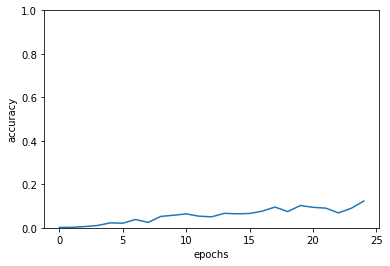

In [43]:
### 에폭에 따른 정확도 그래프
x = np.arange(len(acc_list))
plt.plot(x, acc_list)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.ylim(0, 1.0)
plt.show()

In [45]:
### seq2seq 속도 개선 : 1. 입력 데이터 반전
### seq2seq 평가
(x_train, t_train), (x_test, t_test) = sequence.load_data('addition.txt')
char_to_id, id_to_char = sequence.get_vocab()

is_reverse = True
if is_reverse:
    x_train, x_test = x_train[:, ::-1], x_test[:, ::-1]

vocab_size = len(char_to_id)
wordvec_size = 16
hidden_size = 128
batch_size = 128
max_epoch = 25
max_grad = 5.0

model = Seq2seq(vocab_size, wordvec_size, hidden_size)
optimizer = Adam()
trainer = Trainer(model, optimizer)

reverse_acc_list = []
for epoch in range(max_epoch):
    trainer.fit(x_train, t_train, max_epoch=1, batch_size=batch_size, max_grad=max_grad)
    
    correct_num = 0
    for i in range(len(x_test)):
        question, correct = x_test[[i]], t_test[[i]]
        verbose = i < 10
        correct_num += eval_seq2seq(model, question, correct, id_to_char, verbose, is_reverse=True)
        
    acc = float(correct_num) / len(x_test)
    reverse_acc_list.append(acc)
    print(f'검증 정확도: {acc * 100}')

| 에폭 1 |  반복 1 / 351 | 시간 0[s] | 손실 2.56
| 에폭 1 |  반복 21 / 351 | 시간 2[s] | 손실 2.52
| 에폭 1 |  반복 41 / 351 | 시간 4[s] | 손실 2.17
| 에폭 1 |  반복 61 / 351 | 시간 6[s] | 손실 1.96
| 에폭 1 |  반복 81 / 351 | 시간 9[s] | 손실 1.91
| 에폭 1 |  반복 101 / 351 | 시간 11[s] | 손실 1.87
| 에폭 1 |  반복 121 / 351 | 시간 13[s] | 손실 1.86
| 에폭 1 |  반복 141 / 351 | 시간 15[s] | 손실 1.84
| 에폭 1 |  반복 161 / 351 | 시간 17[s] | 손실 1.80
| 에폭 1 |  반복 181 / 351 | 시간 19[s] | 손실 1.78
| 에폭 1 |  반복 201 / 351 | 시간 21[s] | 손실 1.77
| 에폭 1 |  반복 221 / 351 | 시간 24[s] | 손실 1.77
| 에폭 1 |  반복 241 / 351 | 시간 26[s] | 손실 1.76
| 에폭 1 |  반복 261 / 351 | 시간 28[s] | 손실 1.75
| 에폭 1 |  반복 281 / 351 | 시간 30[s] | 손실 1.74
| 에폭 1 |  반복 301 / 351 | 시간 32[s] | 손실 1.74
| 에폭 1 |  반복 321 / 351 | 시간 35[s] | 손실 1.74
| 에폭 1 |  반복 341 / 351 | 시간 37[s] | 손실 1.73
Q 77+85  
T 162 
☒ 100 
---
Q 975+164
T 1139
☒ 1000
---
Q 582+84 
T 666 
☒ 1001
---
Q 8+155  
T 163 
☒ 100 
---
Q 367+55 
T 422 
☒ 1001
---
Q 600+257
T 857 
☒ 1000
---
Q 761+292
T 1053
☒ 1000
---
Q 830+597
T 1427
☒ 1000

| 에폭 8 |  반복 21 / 351 | 시간 2[s] | 손실 0.61
| 에폭 8 |  반복 41 / 351 | 시간 4[s] | 손실 0.62
| 에폭 8 |  반복 61 / 351 | 시간 6[s] | 손실 0.61
| 에폭 8 |  반복 81 / 351 | 시간 8[s] | 손실 0.61
| 에폭 8 |  반복 101 / 351 | 시간 10[s] | 손실 0.61
| 에폭 8 |  반복 121 / 351 | 시간 12[s] | 손실 0.60
| 에폭 8 |  반복 141 / 351 | 시간 15[s] | 손실 0.60
| 에폭 8 |  반복 161 / 351 | 시간 17[s] | 손실 0.59
| 에폭 8 |  반복 181 / 351 | 시간 20[s] | 손실 0.58
| 에폭 8 |  반복 201 / 351 | 시간 22[s] | 손실 0.59
| 에폭 8 |  반복 221 / 351 | 시간 24[s] | 손실 0.60
| 에폭 8 |  반복 241 / 351 | 시간 26[s] | 손실 0.59
| 에폭 8 |  반복 261 / 351 | 시간 28[s] | 손실 0.58
| 에폭 8 |  반복 281 / 351 | 시간 30[s] | 손실 0.59
| 에폭 8 |  반복 301 / 351 | 시간 33[s] | 손실 0.58
| 에폭 8 |  반복 321 / 351 | 시간 35[s] | 손실 0.57
| 에폭 8 |  반복 341 / 351 | 시간 37[s] | 손실 0.57
Q 77+85  
T 162 
☒ 163 
---
Q 975+164
T 1139
☒ 1134
---
Q 582+84 
T 666 
☑ 666 
---
Q 8+155  
T 163 
☒ 162 
---
Q 367+55 
T 422 
☒ 423 
---
Q 600+257
T 857 
☒ 759 
---
Q 761+292
T 1053
☑ 1053
---
Q 830+597
T 1427
☒ 1431
---
Q 26+838 
T 864 
☒ 866 
---
Q 143+93

검증 정확도: 36.68
| 에폭 15 |  반복 1 / 351 | 시간 0[s] | 손실 0.38
| 에폭 15 |  반복 21 / 351 | 시간 2[s] | 손실 0.39
| 에폭 15 |  반복 41 / 351 | 시간 4[s] | 손실 0.39
| 에폭 15 |  반복 61 / 351 | 시간 6[s] | 손실 0.38
| 에폭 15 |  반복 81 / 351 | 시간 8[s] | 손실 0.38
| 에폭 15 |  반복 101 / 351 | 시간 10[s] | 손실 0.38
| 에폭 15 |  반복 121 / 351 | 시간 12[s] | 손실 0.38
| 에폭 15 |  반복 141 / 351 | 시간 14[s] | 손실 0.38
| 에폭 15 |  반복 161 / 351 | 시간 17[s] | 손실 0.38
| 에폭 15 |  반복 181 / 351 | 시간 19[s] | 손실 0.38
| 에폭 15 |  반복 201 / 351 | 시간 21[s] | 손실 0.38
| 에폭 15 |  반복 221 / 351 | 시간 23[s] | 손실 0.39
| 에폭 15 |  반복 241 / 351 | 시간 25[s] | 손실 0.38
| 에폭 15 |  반복 261 / 351 | 시간 27[s] | 손실 0.37
| 에폭 15 |  반복 281 / 351 | 시간 29[s] | 손실 0.37
| 에폭 15 |  반복 301 / 351 | 시간 31[s] | 손실 0.39
| 에폭 15 |  반복 321 / 351 | 시간 34[s] | 손실 0.39
| 에폭 15 |  반복 341 / 351 | 시간 36[s] | 손실 0.37
Q 77+85  
T 162 
☑ 162 
---
Q 975+164
T 1139
☒ 1137
---
Q 582+84 
T 666 
☒ 667 
---
Q 8+155  
T 163 
☒ 164 
---
Q 367+55 
T 422 
☒ 420 
---
Q 600+257
T 857 
☒ 856 
---
Q 761+292
T 1053
☒ 

검증 정확도: 51.019999999999996
| 에폭 22 |  반복 1 / 351 | 시간 0[s] | 손실 0.32
| 에폭 22 |  반복 21 / 351 | 시간 2[s] | 손실 0.29
| 에폭 22 |  반복 41 / 351 | 시간 4[s] | 손실 0.28
| 에폭 22 |  반복 61 / 351 | 시간 6[s] | 손실 0.29
| 에폭 22 |  반복 81 / 351 | 시간 8[s] | 손실 0.29
| 에폭 22 |  반복 101 / 351 | 시간 10[s] | 손실 0.28
| 에폭 22 |  반복 121 / 351 | 시간 12[s] | 손실 0.29
| 에폭 22 |  반복 141 / 351 | 시간 14[s] | 손실 0.31
| 에폭 22 |  반복 161 / 351 | 시간 17[s] | 손실 0.31
| 에폭 22 |  반복 181 / 351 | 시간 19[s] | 손실 0.30
| 에폭 22 |  반복 201 / 351 | 시간 21[s] | 손실 0.28
| 에폭 22 |  반복 221 / 351 | 시간 23[s] | 손실 0.32
| 에폭 22 |  반복 241 / 351 | 시간 25[s] | 손실 0.33
| 에폭 22 |  반복 261 / 351 | 시간 27[s] | 손실 0.32
| 에폭 22 |  반복 281 / 351 | 시간 29[s] | 손실 0.31
| 에폭 22 |  반복 301 / 351 | 시간 32[s] | 손실 0.30
| 에폭 22 |  반복 321 / 351 | 시간 34[s] | 손실 0.29
| 에폭 22 |  반복 341 / 351 | 시간 36[s] | 손실 0.31
Q 77+85  
T 162 
☑ 162 
---
Q 975+164
T 1139
☑ 1139
---
Q 582+84 
T 666 
☑ 666 
---
Q 8+155  
T 163 
☑ 163 
---
Q 367+55 
T 422 
☒ 423 
---
Q 600+257
T 857 
☒ 856 
---
Q 761+

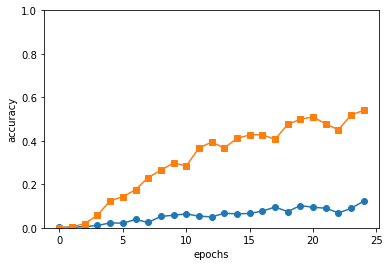

In [46]:
x = np.arange(len(acc_list))
plt.plot(x, acc_list, marker='o')
plt.plot(x, reverse_acc_list, marker='s')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.ylim(0, 1.0)
plt.show()

In [76]:
### seq2seq 속도 개선 : 2. peeky seq2seq
class PeekyDecoder:
    def __init__(self, vocab_size, wordvec_size, hidden_size):
        V, D, H = vocab_size, wordvec_size, hidden_size
        
        embed_W = (np.random.randn(V, D) / 100).astype('f')
        lstm_Wx = (np.random.randn(H+D, 4*H) / np.sqrt(D+H)).astype('f')
        lstm_Wh = (np.random.randn(H, 4*H) / np.sqrt(H)).astype('f')
        lstm_b = np.zeros(4*H).astype('f')
        affine_W = (np.random.randn(H+H, V) / np.sqrt(H+H)).astype('f')
        affine_b = np.zeros(V).astype('f')
        
        self.embed = TimeEmbedding(embed_W)
        self.lstm = TimeLSTM(lstm_Wx, lstm_Wh, lstm_b, stateful=True)
        self.affine = TimeAffine(affine_W, affine_b)
        
        self.params, self.grads = [], []
        for layer in (self.embed, self.lstm, self.affine):
            self.params += layer.params
            self.grads += layer.grads
            
        self.cache = None
        
    def forward(self, xs, h):
        N,T = xs.shape
        N,H = h.shape
        self.lstm.set_state(h)
        
        out = self.embed.forward(xs)
        hs = np.repeat(h, T, axis=0).reshape(N, T, H)
        out = np.concatenate((hs, out), axis=2)
        
        out = self.lstm.forward(out)
        out= np.concatenate((hs, out), axis=2)
        
        score = self.affine.forward(out)
        self.cache = H
        
        return score
    
    def backward(self, dscore):
        H = self.cache
        
        dout = self.affine.backward(dscore)
        dhs0, dout = dout[:, :, :H], dout[:, :, H:]
        dout = self.lstm.backward(dout)
        dhs1, dembed = dout[:, :, :H], dout[:, :, H:]
        self.embed.backward(dembed)
        
        dhs = dhs0 + dhs1
        dh = self.lstm.dh + np.sum(dhs, axis=1)
        return dh
    
    def generate(self, h, start_id, sample_size):
        sampled = []
        char_id = start_id
        self.lstm.set_state(h)
        
        H = h.shape[1]
        peeky_h = h.reshape(1, 1, H)
        for _ in range(sample_size):
            x = np.array([char_id]).reshape((1, 1))
            out = self.embed.forward(x)
            
            out = np.concatenate((peeky_h, out), axis=2)
            out = self.lstm.forward(out)
            out= np.concatenate((peeky_h, out), axis=2)
            score = self.affine.forward(out)
            
            char_id = np.argmax(score.flatten())
            sampled.append(char_id)
            
        return sampled

In [65]:
N = 2
T = 3
H = 4
D = 5

h = np.random.rand(1,H)
h.reshape(1, 1, H)

array([[[0.45874807, 0.40414486, 0.7931028 , 0.72089976]]])

In [54]:
hs = np.repeat(h, T, axis=0)
hs

array([[0.36650992, 0.84421554, 0.53769703, 0.7816876 ],
       [0.36650992, 0.84421554, 0.53769703, 0.7816876 ],
       [0.36650992, 0.84421554, 0.53769703, 0.7816876 ],
       [0.3181778 , 0.18278969, 0.15457903, 0.60989629],
       [0.3181778 , 0.18278969, 0.15457903, 0.60989629],
       [0.3181778 , 0.18278969, 0.15457903, 0.60989629]])

In [55]:
hs.reshape(N, T, H)

array([[[0.36650992, 0.84421554, 0.53769703, 0.7816876 ],
        [0.36650992, 0.84421554, 0.53769703, 0.7816876 ],
        [0.36650992, 0.84421554, 0.53769703, 0.7816876 ]],

       [[0.3181778 , 0.18278969, 0.15457903, 0.60989629],
        [0.3181778 , 0.18278969, 0.15457903, 0.60989629],
        [0.3181778 , 0.18278969, 0.15457903, 0.60989629]]])

In [61]:
dhs0 = np.arange(24).reshape(N,T,H)
dhs1 = np.arange(24).reshape(N,T,H)
dhs0

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [63]:
dhs = dhs0 + dhs1
dhs

array([[[ 0,  2,  4,  6],
        [ 8, 10, 12, 14],
        [16, 18, 20, 22]],

       [[24, 26, 28, 30],
        [32, 34, 36, 38],
        [40, 42, 44, 46]]])

In [78]:
### PeekySeq2seq 구현
class PeekySeq2seq(Seq2seq):
    def __init__(self, vocab_size, wordvec_size, hidden_size):
        V, D, H = vocab_size, wordvec_size, hidden_size
        self.encoder = Encoder(V, D, H)
        self.decoder = PeekyDecoder(V, D, H)
        self.softmax = TimeSoftmaxWithLoss()
        
        self.params = self.encoder.params + self.decoder.params
        self.grads = self.encoder.grads + self.decoder.grads

In [79]:
### PeekySeq2seq 평가
(x_train, t_train), (x_test, t_test) = sequence.load_data('addition.txt')
char_to_id, id_to_char = sequence.get_vocab()

is_reverse = True
if is_reverse:
    x_train, x_test = x_train[:, ::-1], x_test[:, ::-1]

vocab_size = len(char_to_id)
wordvec_size = 16
hidden_size = 128
batch_size = 128
max_epoch = 25
max_grad = 5.0

model = PeekySeq2seq(vocab_size, wordvec_size, hidden_size)
optimizer = Adam()
trainer = Trainer(model, optimizer)

peeky_reverse_acc_list = []
for epoch in range(max_epoch):
    trainer.fit(x_train, t_train, max_epoch=1, batch_size=batch_size, max_grad=max_grad)
    
    correct_num = 0
    for i in range(len(x_test)):
        question, correct = x_test[[i]], t_test[[i]]
        verbose = i < 10
        correct_num += eval_seq2seq(model, question, correct, id_to_char, verbose, is_reverse=True)
        
    acc = float(correct_num) / len(x_test)
    peeky_reverse_acc_list.append(acc)
    print(f'검증 정확도: {acc * 100}')

| 에폭 1 |  반복 1 / 351 | 시간 0[s] | 손실 2.57
| 에폭 1 |  반복 21 / 351 | 시간 2[s] | 손실 2.48
| 에폭 1 |  반복 41 / 351 | 시간 4[s] | 손실 2.20
| 에폭 1 |  반복 61 / 351 | 시간 7[s] | 손실 1.99
| 에폭 1 |  반복 81 / 351 | 시간 9[s] | 손실 1.89
| 에폭 1 |  반복 101 / 351 | 시간 12[s] | 손실 1.82
| 에폭 1 |  반복 121 / 351 | 시간 14[s] | 손실 1.82
| 에폭 1 |  반복 141 / 351 | 시간 17[s] | 손실 1.80
| 에폭 1 |  반복 161 / 351 | 시간 19[s] | 손실 1.79
| 에폭 1 |  반복 181 / 351 | 시간 22[s] | 손실 1.78
| 에폭 1 |  반복 201 / 351 | 시간 24[s] | 손실 1.77
| 에폭 1 |  반복 221 / 351 | 시간 27[s] | 손실 1.76
| 에폭 1 |  반복 241 / 351 | 시간 29[s] | 손실 1.76
| 에폭 1 |  반복 261 / 351 | 시간 32[s] | 손실 1.75
| 에폭 1 |  반복 281 / 351 | 시간 34[s] | 손실 1.74
| 에폭 1 |  반복 301 / 351 | 시간 36[s] | 손실 1.74
| 에폭 1 |  반복 321 / 351 | 시간 39[s] | 손실 1.73
| 에폭 1 |  반복 341 / 351 | 시간 41[s] | 손실 1.73
Q 77+85  
T 162 
☒ 100 
---
Q 975+164
T 1139
☒ 1013
---
Q 582+84 
T 666 
☒ 102 
---
Q 8+155  
T 163 
☒ 100 
---
Q 367+55 
T 422 
☒ 1023
---
Q 600+257
T 857 
☒ 1023
---
Q 761+292
T 1053
☒ 1023
---
Q 830+597
T 1427
☒ 1111

| 에폭 8 |  반복 21 / 351 | 시간 2[s] | 손실 0.50
| 에폭 8 |  반복 41 / 351 | 시간 4[s] | 손실 0.49
| 에폭 8 |  반복 61 / 351 | 시간 7[s] | 손실 0.48
| 에폭 8 |  반복 81 / 351 | 시간 9[s] | 손실 0.47
| 에폭 8 |  반복 101 / 351 | 시간 11[s] | 손실 0.46
| 에폭 8 |  반복 121 / 351 | 시간 14[s] | 손실 0.46
| 에폭 8 |  반복 141 / 351 | 시간 16[s] | 손실 0.44
| 에폭 8 |  반복 161 / 351 | 시간 18[s] | 손실 0.41
| 에폭 8 |  반복 181 / 351 | 시간 21[s] | 손실 0.42
| 에폭 8 |  반복 201 / 351 | 시간 23[s] | 손실 0.41
| 에폭 8 |  반복 221 / 351 | 시간 25[s] | 손실 0.40
| 에폭 8 |  반복 241 / 351 | 시간 28[s] | 손실 0.39
| 에폭 8 |  반복 261 / 351 | 시간 30[s] | 손실 0.37
| 에폭 8 |  반복 281 / 351 | 시간 32[s] | 손실 0.36
| 에폭 8 |  반복 301 / 351 | 시간 35[s] | 손실 0.36
| 에폭 8 |  반복 321 / 351 | 시간 37[s] | 손실 0.35
| 에폭 8 |  반복 341 / 351 | 시간 40[s] | 손실 0.34
Q 77+85  
T 162 
☒ 161 
---
Q 975+164
T 1139
☑ 1139
---
Q 582+84 
T 666 
☒ 657 
---
Q 8+155  
T 163 
☒ 155 
---
Q 367+55 
T 422 
☑ 422 
---
Q 600+257
T 857 
☑ 857 
---
Q 761+292
T 1053
☑ 1053
---
Q 830+597
T 1427
☒ 1438
---
Q 26+838 
T 864 
☑ 864 
---
Q 143+93

| 에폭 15 |  반복 21 / 351 | 시간 2[s] | 손실 0.04
| 에폭 15 |  반복 41 / 351 | 시간 4[s] | 손실 0.04
| 에폭 15 |  반복 61 / 351 | 시간 7[s] | 손실 0.04
| 에폭 15 |  반복 81 / 351 | 시간 9[s] | 손실 0.04
| 에폭 15 |  반복 101 / 351 | 시간 12[s] | 손실 0.04
| 에폭 15 |  반복 121 / 351 | 시간 14[s] | 손실 0.03
| 에폭 15 |  반복 141 / 351 | 시간 18[s] | 손실 0.03
| 에폭 15 |  반복 161 / 351 | 시간 21[s] | 손실 0.04
| 에폭 15 |  반복 181 / 351 | 시간 24[s] | 손실 0.04
| 에폭 15 |  반복 201 / 351 | 시간 27[s] | 손실 0.04
| 에폭 15 |  반복 221 / 351 | 시간 31[s] | 손실 0.04
| 에폭 15 |  반복 241 / 351 | 시간 34[s] | 손실 0.04
| 에폭 15 |  반복 261 / 351 | 시간 37[s] | 손실 0.06
| 에폭 15 |  반복 281 / 351 | 시간 40[s] | 손실 0.06
| 에폭 15 |  반복 301 / 351 | 시간 42[s] | 손실 0.05
| 에폭 15 |  반복 321 / 351 | 시간 45[s] | 손실 0.06
| 에폭 15 |  반복 341 / 351 | 시간 47[s] | 손실 0.06
Q 77+85  
T 162 
☑ 162 
---
Q 975+164
T 1139
☑ 1139
---
Q 582+84 
T 666 
☑ 666 
---
Q 8+155  
T 163 
☑ 163 
---
Q 367+55 
T 422 
☑ 422 
---
Q 600+257
T 857 
☑ 857 
---
Q 761+292
T 1053
☑ 1053
---
Q 830+597
T 1427
☑ 1427
---
Q 26+838 
T 864 
☑ 

검증 정확도: 96.2
| 에폭 22 |  반복 1 / 351 | 시간 0[s] | 손실 0.02
| 에폭 22 |  반복 21 / 351 | 시간 2[s] | 손실 0.02
| 에폭 22 |  반복 41 / 351 | 시간 4[s] | 손실 0.02
| 에폭 22 |  반복 61 / 351 | 시간 7[s] | 손실 0.02
| 에폭 22 |  반복 81 / 351 | 시간 9[s] | 손실 0.02
| 에폭 22 |  반복 101 / 351 | 시간 11[s] | 손실 0.01
| 에폭 22 |  반복 121 / 351 | 시간 14[s] | 손실 0.01
| 에폭 22 |  반복 141 / 351 | 시간 16[s] | 손실 0.01
| 에폭 22 |  반복 161 / 351 | 시간 19[s] | 손실 0.01
| 에폭 22 |  반복 181 / 351 | 시간 21[s] | 손실 0.01
| 에폭 22 |  반복 201 / 351 | 시간 23[s] | 손실 0.01
| 에폭 22 |  반복 221 / 351 | 시간 26[s] | 손실 0.01
| 에폭 22 |  반복 241 / 351 | 시간 28[s] | 손실 0.01
| 에폭 22 |  반복 261 / 351 | 시간 30[s] | 손실 0.01
| 에폭 22 |  반복 281 / 351 | 시간 33[s] | 손실 0.01
| 에폭 22 |  반복 301 / 351 | 시간 35[s] | 손실 0.01
| 에폭 22 |  반복 321 / 351 | 시간 38[s] | 손실 0.02
| 에폭 22 |  반복 341 / 351 | 시간 40[s] | 손실 0.03
Q 77+85  
T 162 
☑ 162 
---
Q 975+164
T 1139
☑ 1139
---
Q 582+84 
T 666 
☑ 666 
---
Q 8+155  
T 163 
☑ 163 
---
Q 367+55 
T 422 
☑ 422 
---
Q 600+257
T 857 
☑ 857 
---
Q 761+292
T 1053
☑ 1

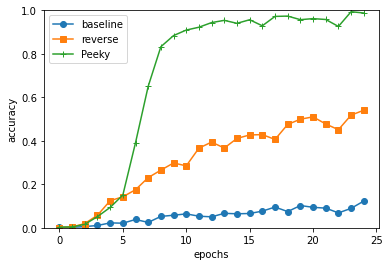

In [82]:
x = np.arange(len(acc_list))
plt.plot(x, acc_list, marker='o', label ='baseline')
plt.plot(x, reverse_acc_list, marker='s', label='reverse')
plt.plot(x, peeky_reverse_acc_list, marker = '+', label='Peeky')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.ylim(0, 1.0)
plt.legend()
plt.show()